In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Synthetic Data  ---
generate_synthetic_multi_attribute_seismic_data=pd.read_csv('synthetic_seismic_data.csv')

In [4]:
# Generate the data
synthetic_seismic_attributes = generate_synthetic_multi_attribute_seismic_data
print("--- Original Synthetic Seismic Attributes (First 5 rows) ---")
print(synthetic_seismic_attributes.head())
print("\n--- Correlation Matrix of Original Attributes ---")
print(synthetic_seismic_attributes.corr().round(2))

--- Original Synthetic Seismic Attributes (First 5 rows) ---
   Attribute_RMS_Amplitude  Attribute_Dominant_Frequency  \
0                52.483571                     27.778533   
1                49.560503                     30.665294   
2                53.742052                     20.678395   
3                58.370463                     26.500079   
4                49.836132                     22.796348   

   Attribute_Acoustic_Impedance  Attribute_AVO_Intercept  Attribute_Noise  
0                   8069.967772                 0.538918        -6.751783  
1                   8033.640463                 0.485032        -1.445187  
2                   7977.801073                 0.484271        -7.924199  
3                   7929.887483                 0.537597        -3.079615  
4                   7984.566243                 0.541836       -18.936147  

--- Correlation Matrix of Original Attributes ---
                              Attribute_RMS_Amplitude  \
Attribute_RMS_

In [13]:
# --- Data Preprocessing: Scaling ---
# PCA is sensitive to the scale of the features, so it's crucial to scale them.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(synthetic_seismic_attributes)
X_scaled_df = pd.DataFrame(X_scaled,
columns=synthetic_seismic_attributes.columns)
print("\n--- Scaled Attributes (First 5 rows) ---")
print(X_scaled_df.head())



--- Scaled Attributes (First 5 rows) ---
   Attribute_RMS_Amplitude  Attribute_Dominant_Frequency  \
0                 0.164621                      0.560366   
1                -0.031836                      1.163277   
2                 0.249203                     -0.922525   
3                 0.560276                      0.293356   
4                -0.013311                     -0.480182   

   Attribute_Acoustic_Impedance  Attribute_AVO_Intercept  Attribute_Noise  
0                      0.091231                 0.052484        -0.692320  
1                      0.039883                -0.023422        -0.138746  
2                     -0.039045                -0.024495        -0.814624  
3                     -0.106770                 0.050623        -0.309246  
4                     -0.029482                 0.056594        -1.963370  


In [16]:
# --- Apply PCA ---
print("\n--- Applying PCA ---")
# Initialize PCA. We can specify the number of components or the variance to explain.
# Let's aim for 2 principal components for visualization.
pca = PCA(n_components=2)
# Fit PCA to the scaled data and transform it
principal_components = pca.fit_transform(X_scaled_df)


--- Applying PCA ---


In [23]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components,
                     columns=["Principal_Component_1", "Principal_Component_2"])
print("\n--- Principal Components (First 5 rows) ---")
print(pca_df.head())
print("\n--- Explained Variance Ratio ---")
print(pca.explained_variance_ratio_)
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2f}")


--- Principal Components (First 5 rows) ---
   Principal_Component_1  Principal_Component_2
0               0.184927              -0.687347
1               0.581312              -0.131101
2              -0.568246              -0.818331
3              -0.233790              -0.299133
4              -0.284854              -1.965805

--- Explained Variance Ratio ---
[0.72470014 0.19994613]
Total explained variance by 2 components: 0.92


In [40]:
pca_df.to_csv('principal_components.csv', index=False)


Saved PCA plot to pca_seismic_attributes.png


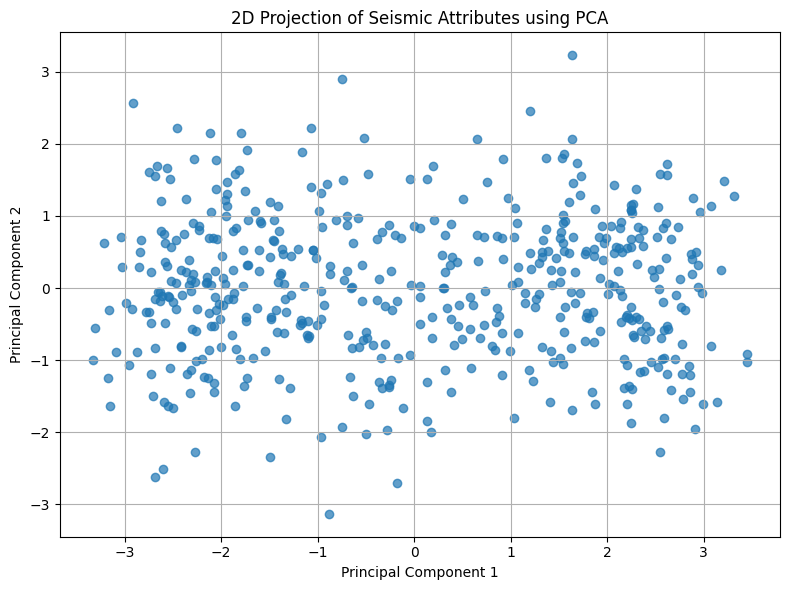

In [27]:
# --- Visualization of Principal Components ---
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["Principal_Component_1"],pca_df["Principal_Component_2"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Projection of Seismic Attributes using PCA")
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('pca_seismic_attributes.png')
print("\nSaved PCA plot to pca_seismic_attributes.png")

In [29]:
# --- Interpretation of PCA Components (Loadings) ---
print("\n--- PCA Component Loadings (Feature Contributions) ---")
# These show how much each original feature contributes to each principal component
loadings = pd.DataFrame(pca.components_.T, columns=["PC1_Loading",
"PC2_Loading"], index=synthetic_seismic_attributes.columns)
print(loadings)


--- PCA Component Loadings (Feature Contributions) ---
                              PC1_Loading  PC2_Loading
Attribute_RMS_Amplitude         -0.505254     0.010340
Attribute_Dominant_Frequency     0.459395     0.007510
Attribute_Acoustic_Impedance     0.516597    -0.015937
Attribute_AVO_Intercept         -0.516352     0.006786
Attribute_Noise                  0.013514     0.999768



Saved PCA loadings heatmap to pca_loadings_heatmap.png


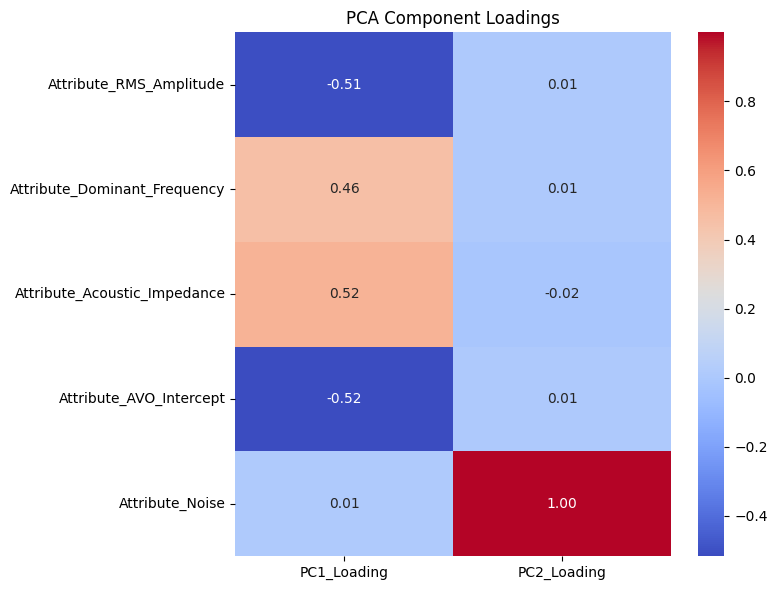

In [31]:
# Visualize loadings (optional, but helpful for interpretation)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("PCA Component Loadings")
plt.tight_layout()
# plt.show()
plt.savefig('pca_loadings_heatmap.png')
print("\nSaved PCA loadings heatmap to pca_loadings_heatmap.png")